In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=DeprecationWarning) 
warnings.simplefilter("ignore", UserWarning)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

njobs = -1

In [3]:
train=pd.read_csv('../../1. Task and Data/train.csv',sep='|')
test=pd.read_csv('../../1. Task and Data/test.csv',sep='|')

In [4]:
print(train.fraud.value_counts())
print(train.fraud.value_counts() / len(train))

0    1775
1     104
Name: fraud, dtype: int64
0    0.944651
1    0.055349
Name: fraud, dtype: float64


# Feature Engineering

In [5]:
# for training set

train['scannedLineItems'] = train['scannedLineItemsPerSecond'] * train['totalScanTimeInSeconds']
train['pricePerScannedLineItem'] = train['grandTotal'] / train['scannedLineItems']
train['scansWithoutRegistrationPerScannedLineItem'] = train['scansWithoutRegistration'] / train['scannedLineItems']
train['quantityModificationsPerScannedLineItem'] = train['quantityModifications'] / train['scannedLineItems']
train['lineItemVoidsPerSecond'] = train['lineItemVoids'] / train['totalScanTimeInSeconds']
train['scansWithoutRegistrationPerSecond'] = train['scansWithoutRegistration'] / train['totalScanTimeInSeconds']
train['quantityModificationsPerSecond'] = train['quantityModifications'] / train['totalScanTimeInSeconds']
train['secondsPerEuro'] = train['totalScanTimeInSeconds'] / train['grandTotal']
train['lineItemVoidsPerEuro'] = train['lineItemVoids'] / train['grandTotal']
train['scansWithoutRegistrationPerEuro'] = train['scansWithoutRegistration'] / train['grandTotal']
train['quantityModificationsPerEuro'] = train['quantityModifications'] / train['grandTotal']

test['scannedLineItems'] = test['scannedLineItemsPerSecond'] * test['totalScanTimeInSeconds']
test['pricePerScannedLineItem'] = test['grandTotal'] / test['scannedLineItems']
test['scansWithoutRegistrationPerScannedLineItem'] = test['scansWithoutRegistration'] / test['scannedLineItems']
test['quantityModificationsPerScannedLineItem'] = test['quantityModifications'] / test['scannedLineItems']
test['lineItemVoidsPerSecond'] = test['lineItemVoids'] / test['totalScanTimeInSeconds']
test['scansWithoutRegistrationPerSecond'] = test['scansWithoutRegistration'] / test['totalScanTimeInSeconds']
test['quantityModificationsPerSecond'] = test['quantityModifications'] / test['totalScanTimeInSeconds']
test['secondsPerEuro'] = test['totalScanTimeInSeconds'] / test['grandTotal']
test['lineItemVoidsPerEuro'] = test['lineItemVoids'] / test['grandTotal']
test['scansWithoutRegistrationPerEuro'] = test['scansWithoutRegistration'] / test['grandTotal']
test['quantityModificationsPerEuro'] = test['quantityModifications'] / test['grandTotal']

In [6]:
test.loc[test['grandTotal'] == 0.00, 'secondsPerEuro'] = test['totalScanTimeInSeconds'] / 0.01
test.loc[test['grandTotal'] == 0.00, 'lineItemVoidsPerEuro'] = test['lineItemVoids'] / 0.01
test.loc[test['grandTotal'] == 0.00, 'scansWithoutRegistrationPerEuro'] = test['scansWithoutRegistration'] / 0.01
test.loc[test['grandTotal'] == 0.00, 'quantityModificationsPerEuro'] = test['quantityModifications'] / 0.01

Add tSNE/PCA Features

In [7]:
train_test_combined = pd.concat([train, test], ignore_index=True)

In [8]:
X_train_test_combined = train_test_combined.drop('fraud',axis=1)
Y_train_test_combined = train_test_combined['fraud']
print(X_train_test_combined.shape, Y_train_test_combined.shape)

(500000, 20) (500000,)


In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer 

feature_scaler = MinMaxScaler()
X_train_test_combined = pd.DataFrame(feature_scaler.fit_transform(X_train_test_combined.values), columns=X_train_test_combined.columns, index=X_train_test_combined.index)


In [10]:
from sklearn.decomposition import PCA

X_train_test_combined_PCA = X_train_test_combined.copy()

pca = PCA(n_components=7)
pca_result = pca.fit_transform(X_train_test_combined_PCA)

X_train_test_combined_PCA['pca-one'] = pca_result[:,0]
X_train_test_combined_PCA['pca-two'] = pca_result[:,1] 
X_train_test_combined_PCA['pca-three'] = pca_result[:,2]

X_train_test_combined_PCA['pca-one'] = pca_result[:,0]
X_train_test_combined_PCA['pca-two'] = pca_result[:,1] 
X_train_test_combined_PCA['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
print('Cumulative explained variation for 7 principal components: {}'.format(np.sum(pca.explained_variance_ratio_)))

Explained variation per principal component: [0.16124041 0.1559011  0.14737624 0.13509126 0.13197732 0.11312753
 0.11161208]
Cumulative explained variation for 7 principal components: 0.9563259397521087


In [11]:
train['pca_axis_1'] = X_train_test_combined_PCA['pca-one'].head(len(train))
train['pca_axis_2'] = X_train_test_combined_PCA['pca-two'].head(len(train))

In [12]:
X_train_test_combined_tSNE = X_train_test_combined.copy()
tsne_results = pd.read_pickle("tsneResult.pkl").values

In [13]:
X_train_test_combined_tSNE['tsne-one'] = tsne_results[:,0]
X_train_test_combined_tSNE['tsne-two'] = tsne_results[:,1]

In [14]:
X_train_test_combined_tSNE.head()

,grandTotal,lineItemVoids,lineItemVoidsPerEuro,lineItemVoidsPerPosition,lineItemVoidsPerSecond,pricePerScannedLineItem,quantityModifications,quantityModificationsPerEuro,quantityModificationsPerScannedLineItem,quantityModificationsPerSecond,scannedLineItems,scannedLineItemsPerSecond,scansWithoutRegistration,scansWithoutRegistrationPerEuro,scansWithoutRegistrationPerScannedLineItem,scansWithoutRegistrationPerSecond,secondsPerEuro,totalScanTimeInSeconds,trustLevel,valuePerSecond,tsne-one,tsne-two
0,0.547055,0.636364,0.000116,0.021944,0.000604,0.018864,0.6,0.000110,0.020690,0.000569,0.965517,0.000899,0.0,0.000000,0.000000,0.000000,0.000105,0.575410,0.8,0.000520,0.371124,2.065992
1,0.273627,0.454545,0.000166,0.032468,0.004209,0.019545,0.8,0.000292,0.057143,0.007407,0.448276,0.004303,0.2,0.000073,0.014286,0.001852,0.000022,0.058470,0.4,0.002541,1.413292,-0.542113
2,0.621662,0.272727,0.000044,0.020979,0.000180,0.047820,1.0,0.000161,0.076923,0.000660,0.413793,0.000268,1.0,0.000161,0.076923,0.000660,0.000133,0.827869,0.4,0.000411,2.043197,-0.529174
3,0.923192,0.727273,0.000079,0.025078,0.000406,0.031834,0.8,0.000087,0.027586,0.000447,0.965517,0.000522,0.4,0.000043,0.013793,0.000223,0.000106,0.978142,1.0,0.000517,1.375445,2.444786
4,0.815382,0.272727,0.000033,0.010101,0.000634,0.030199,0.4,0.000049,0.014815,0.000930,0.896552,0.002075,0.7,0.000086,0.025926,0.001628,0.000029,0.234426,0.8,0.001902,-0.579406,1.961413


In [15]:
train['tsne_axis_1'] = X_train_test_combined_tSNE['tsne-one'].head(len(train))
train['tsne_axis_2'] = X_train_test_combined_tSNE['tsne-two'].head(len(train))

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer

def my_custom_loss_func(y_true, y_pred):
    cm = confusion_matrix(y_true,y_pred)
    tn, fp, fn, tp = cm.ravel()
    score = ((-25)*fp + (-5)*fn + 5*tp) / len(y_true)
    return (score)

my_custom_score = make_scorer(my_custom_loss_func, greater_is_better=True)

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut

skf = StratifiedKFold(n_splits=10)
loo = LeaveOneOut()

In [17]:
def get_monetary_value(cm):
        tn, fp, fn, tp = cm.ravel()
        print("True negative: ", tn)
        print("False positive: ", fp)
        print("False negative: ", fn)
        print("True positive: ", tp)
        score = (-25)*fp + (-5)*fn + 5*tp
        print(str(score) + " for " + str(sum(sum(cm))) + " instances in the test set")
        print(str(score/sum(sum(cm))) + " per instance in the test set")
        return score

# Ensemble Methods

#### Base Estimators

In [82]:
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors.classification import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model.ridge import RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

log_reg = LogisticRegression(C = 1.2000000000000002,
                           fit_intercept = True,
                           solver = 'newton-cg')
extra_trees = ExtraTreesClassifier(criterion = 'gini',
                                  n_estimators = 69)
random_forest = RandomForestClassifier(criterion = 'entropy', 
                                  n_estimators=40)
lda = LinearDiscriminantAnalysis(n_components = 1, solver = 'lsqr')
svc = SVC(C=4.0, class_weight='balanced', coef0=0.0,
        kernel='linear',
        random_state=42)
k_neighbors = KNeighborsClassifier(n_neighbors = 10, weights = 'distance', p = 2)
gaussian_nb = GaussianNB(priors = None, var_smoothing = 1e-09)




#Boosting:
xg_boost = XGBClassifier(objective="binary:logistic",
                    random_state=42,
                    max_depth=5,
                    min_child_weight= 1,
                    gamma = 0,
                    subsample = 0.8,
                    colsample_bytree = 0.8,
                    scale_pos_weight = 1,
                    n_jobs = -1
                   )
ada_boost = AdaBoostClassifier(n_estimators=100,
                         learning_rate=1)




clfs_labeled=[('lr', log_reg), ('et', extra_trees), ('lda', lda), ('svc', svc), ('kn', k_neighbors),('nb', gaussian_nb)]
clfs_unlabeled=[log_reg, extra_trees, lda, svc, k_neighbors, gaussian_nb]
clf_labels=labels = ['lr', 'et', 'lda', 'svc', 'kn', 'nb']

### vecstack
https://github.com/vecxoz/vecstack

With SKLearn Wrapper:

In [20]:
from vecstack import StackingTransformer

stack = StackingTransformer(clfs_labeled, regression=False, verbose=2)

stack = stack.fit(X,y)
S_train2 = stack.transform(X)

#stack = stack.fit(X_train, y_train)

#S_train2 = stack.transform(X_train)
#S_test2 = stack.transform(X_test)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
variant:      [A]
n_estimators: [6]

estimator  0: [lr: LogisticRegression]
    fold  0:  [0.98085106]
    fold  1:  [0.98936170]
    fold  2:  [0.99787234]
    fold  3:  [0.98081023]
    ----
    MEAN:     [0.98722384] + [0.00706590]

estimator  1: [et: ExtraTreesClassifier]
    fold  0:  [0.98297872]
    fold  1:  [0.99361702]
    fold  2:  [0.97872340]
    fold  3:  [0.96588486]
    ----
    MEAN:     [0.98030100] + [0.00993479]

estimator  2: [lda: LinearDiscriminantAnalysis]
    fold  0:  [0.96595745]
    fold  1:  [0.98085106]
    fold  2:  [0.98510638]
    fold  3:  [0.95309168]
    ----
    MEAN:     [0.97125164] + [0.01266802]

estimator  3: [svc: SVC]
    fold  0:  [0.98085106]
    fold  1:  [0.99148936]
    fold  2:  [0.98936170]
    fold  3:  [0.98933902]
    ----
    MEAN:     [0.98776029] + [0.00408351]

estimator  4: [kn: KNeighborsClassifier]
    fold  0:  [0.94468085]
    fold  1:  [0.95744

In [21]:
df_S_train2 = pd.DataFrame(S_train2)
df_S_train2.columns = clf_labels

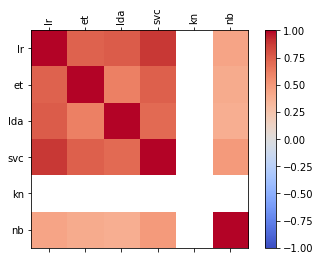

In [22]:
import matplotlib.pyplot as plt

corr = df_S_train2.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df_S_train2.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df_S_train2.columns)
ax.set_yticklabels(df_S_train2.columns)
plt.show()

In [24]:
print("STrain2 ", df_S_train2.shape)
print("XTrain ", X.shape)

S_train_combined = pd.concat([X, df_S_train2], axis =1)
print("STrainCombined ", S_train_combined.shape)
#S_train_combined

#model = xg_boost.fit(S_train_combined, y_train)
#y_pred = model.predict(S_test2)

#cm = confusion_matrix(y_test, y_pred)
#get_monetary_value(cm)

STrain2  (1879, 6)
XTrain  (1879, 24)
STrainCombined  (1879, 30)


In [88]:
from sklearn.ensemble import ExtraTreesClassifier
# load data

y = train['fraud']
x = S_train_combined

# feature extraction
model = ExtraTreesClassifier(criterion = 'entropy')
model.fit(x, y)

pd.DataFrame(model.feature_importances_, list(x), columns =['Importance']).sort_values(by='Importance', ascending = False)

,Importance
svc,0.332815
lr,0.200191
lda,0.134184
tsne_axis_2,0.046865
nb,0.046223
trustLevel,0.043419
et,0.036556
pca_axis_2,0.022545
scannedLineItems,0.019359
valuePerSecond,0.010042


# Model tuning

In [90]:
from sklearn.ensemble import VotingClassifier

estimators = [('ada', ada_boost),('xgb', xg_boost)]

voting_est = VotingClassifier(estimators = estimators,
                                       voting = 'soft', 
                                       weights = [5,3],
                                       n_jobs = 50)

def combinations_on_off(num_classifiers):
    return [[int(x) for x in list("{0:0b}".format(i).zfill(num_classifiers))]
            for i in range(1, 2 ** num_classifiers)]


param_grid = dict(
    weights=[[5,3], [1,1], [3,5]],#combinations_on_off(len(estimators)),
    voting=['soft'])

#### Grid Search

In [91]:
from sklearn.model_selection import GridSearchCV



model_tuning_factory = [
    GridSearchCV(voting_est, 
                    param_grid=param_grid,
                    cv=skf,
                    n_jobs=-1, 
                    verbose=10, 
                    scoring=my_custom_score)
                ]

#### Random Search

In [92]:
from sklearn.model_selection import RandomizedSearchCV

iterations = 1

model_tuning_factory_randomized = [
    RandomizedSearchCV(voting_est, 
                    param_grid,
                    cv=skf,
                    n_jobs=-1, 
                    verbose=10,
                    n_iter=iterations,
                    scoring=my_custom_score)
                ]

In [93]:
Y = train['fraud']
X = S_train_combined

In [94]:
import time
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE


import time
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE

from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

result_table = pd.DataFrame(columns=["Model", "Data Preparation", "Feature Count", "Feature Selection Technique", "Features", "Optimal Parameters", "Monetary Value Per Instance - Mean", "Monetary Value Per Instance - Standard Deviation", "Raw Model"])
X_scaled = X   
data_preparation = "No Scaling"


######### TODO: Feature Importance xgboost: get_fscore()
for model in model_tuning_factory:   # replace with model_tuning_factory_randomized for faster results


    for feature_count in range(1,len(list(X))+1):
        
        model.seed = 42
        start_time = time.time()              


        # Solution with SelectKBest
        best_features = SelectKBest(f_classif, k=feature_count).fit(X_scaled,Y)
        best_feature_list = X.columns[best_features.get_support()]
        X_selected_features = X[best_feature_list]

        model.fit(X_selected_features,Y)  
        model_name = model.best_estimator_.__class__.__name__
        score_mean = model.cv_results_['mean_test_score'][model.best_index_]
        score_std = model.cv_results_['std_test_score'][model.best_index_]

        result_table = result_table.append({
         "Model": model_name, 
         "Data Preparation": data_preparation,   
         "Feature Count": feature_count,
         "Feature Selection Technique": "SelectKBest",   
         "Features": best_feature_list.values, 
         "Optimal Parameters": model.best_params_,
         "Monetary Value Per Instance - Mean":  score_mean,
         "Monetary Value Per Instance - Standard Deviation": score_std,   
         "Raw Model": model.best_estimator_
          }, ignore_index=True)


        # Solution with Recursive Feature Elimination -> only works for some models

        if (model.estimator.__class__.__name__ == 'LogisticRegression'
         or model.estimator.__class__.__name__ == 'DecisionTreeClassifier'
         or model.estimator.__class__.__name__ == 'ExtraTreeClassifier'
         or model.estimator.__class__.__name__ == 'ExtraTreesClassifier'
         or model.estimator.__class__.__name__ == 'RandomForestClassifier'
         or model.estimator.__class__.__name__ == 'BernoulliNB'
         or model.estimator.__class__.__name__ == 'AdaBoostClassifier'
         or model.estimator.__class__.__name__ == 'GradientBoostingClassifier'
         or model.estimator.__class__.__name__ == 'Perceptron'
         or model.estimator.__class__.__name__ == 'LinearDiscriminantAnalysis'
         or model.estimator.__class__.__name__ == 'XGBClassifier'):

           # Traditional RFE
            rfe = RFE(model.estimator, n_features_to_select = feature_count)
            rfe = rfe.fit(X,Y)
            best_feature_list = np.array(list(X))[np.array(rfe.support_)]
            X_selected_features = X[best_feature_list]

            model.fit(X_selected_features,Y)  
            model_name = model.best_estimator_.__class__.__name__
            score_mean = model.cv_results_['mean_test_score'][model.best_index_]
            score_std = model.cv_results_['std_test_score'][model.best_index_]


            result_table = result_table.append({
             "Model": model_name, 
             "Data Preparation": data_preparation,
             "Feature Count": feature_count,
             "Feature Selection Technique": "RFE",
             "Features": best_feature_list,
             "Optimal Parameters": model.best_params_,
             "Monetary Value Per Instance - Mean":  score_mean,
             "Monetary Value Per Instance - Standard Deviation": score_std,  
             "Raw Model": model.best_estimator_
              }, ignore_index=True)

        end_time = time.time()

        print("Finished " + model.best_estimator_.__class__.__name__ + " with " + data_preparation + " and " + str(feature_count) + " features after " + str(round(end_time - start_time, 2)) + " seconds")



    if (model.estimator.__class__.__name__ == 'LogisticRegression'
     or model.estimator.__class__.__name__ == 'DecisionTreeClassifier'
     or model.estimator.__class__.__name__ == 'ExtraTreeClassifier'
     or model.estimator.__class__.__name__ == 'ExtraTreesClassifier'
     or model.estimator.__class__.__name__ == 'RandomForestClassifier'
     or model.estimator.__class__.__name__ == 'BernoulliNB'
     or model.estimator.__class__.__name__ == 'AdaBoostClassifier'
     or model.estimator.__class__.__name__ == 'GradientBoostingClassifier'
     or model.estimator.__class__.__name__ == 'Perceptron'
     or model.estimator.__class__.__name__ == 'LinearDiscriminantAnalysis'
     or model.estimator.__class__.__name__ == 'XGBClassifier'):

        # RFE with Cross Validation -> determines the optimum feature count automatically
        rfecv = RFECV(model.estimator, cv = skf, scoring = my_custom_score)
        rfecv = rfe.fit(X,Y)
        best_feature_list = np.array(list(X))[np.array(rfecv.support_)]
        X_selected_features = X[best_feature_list]

        model.fit(X_selected_features,Y)  
        model_name = model.best_estimator_.__class__.__name__
        score_mean = model.cv_results_['mean_test_score'][model.best_index_]
        score_std = model.cv_results_['std_test_score'][model.best_index_]


        result_table = result_table.append({
         "Model": model_name,  
         "Data Preparation": data_preparation,
         "Feature Count": len(best_feature_list),
         "Feature Selection Technique": "RFECV",
         "Features": best_feature_list,
         "Optimal Parameters": model.best_params_,
         "Monetary Value Per Instance - Mean":  score_mean,
         "Monetary Value Per Instance - Standard Deviation": score_std,    
         "Raw Model": model.best_estimator_
          }, ignore_index=True)


result_table.sort_values(by = "Monetary Value Per Instance - Mean", ascending = False)

C:\Users\Lukas\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:   10.1s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:   10.5s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:   10.9s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   11.0s finished


Finished VotingClassifier with No Scaling and 1 features after 18.82 seconds


C:\Users\Lukas\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:    6.4s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    7.1s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:    7.3s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    7.5s finished


Finished VotingClassifier with No Scaling and 2 features after 16.17 seconds


C:\Users\Lukas\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:    7.8s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    8.3s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:    8.5s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    8.8s finished


Finished VotingClassifier with No Scaling and 3 features after 19.23 seconds


C:\Users\Lukas\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:    6.1s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    6.6s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:    7.0s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    7.1s finished


Finished VotingClassifier with No Scaling and 4 features after 17.19 seconds


C:\Users\Lukas\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:    6.6s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    7.0s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:    7.4s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    7.6s finished


Finished VotingClassifier with No Scaling and 5 features after 17.48 seconds


C:\Users\Lukas\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:    7.2s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    7.3s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:    8.0s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    8.1s finished


Finished VotingClassifier with No Scaling and 6 features after 18.19 seconds


C:\Users\Lukas\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:    6.5s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    7.0s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:    7.6s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    7.7s finished


Finished VotingClassifier with No Scaling and 7 features after 17.75 seconds


C:\Users\Lukas\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:    5.9s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    6.4s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:    7.0s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    7.1s finished


Finished VotingClassifier with No Scaling and 8 features after 16.89 seconds


C:\Users\Lukas\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:    6.0s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    6.5s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:    7.1s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    7.2s finished


Finished VotingClassifier with No Scaling and 9 features after 16.93 seconds


C:\Users\Lukas\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:    7.8s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    8.4s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:    9.2s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    9.3s finished


Finished VotingClassifier with No Scaling and 10 features after 20.78 seconds


C:\Users\Lukas\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:    8.7s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    9.4s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:    9.9s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   10.3s finished


Finished VotingClassifier with No Scaling and 11 features after 20.88 seconds


C:\Users\Lukas\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:    7.7s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    8.1s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:    8.8s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    9.2s finished


Finished VotingClassifier with No Scaling and 12 features after 19.35 seconds


C:\Users\Lukas\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:    9.6s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:   10.9s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:   11.7s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   11.9s finished


Finished VotingClassifier with No Scaling and 13 features after 24.81 seconds


C:\Users\Lukas\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:   10.2s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:   10.9s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:   11.5s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   11.8s finished


Finished VotingClassifier with No Scaling and 14 features after 24.5 seconds


C:\Users\Lukas\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:   11.3s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:   12.4s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:   13.5s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   14.0s finished


Finished VotingClassifier with No Scaling and 15 features after 30.77 seconds


C:\Users\Lukas\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:   12.3s remaining:    7.1s
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:   15.0s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:   17.1s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   17.5s finished


Finished VotingClassifier with No Scaling and 16 features after 40.14 seconds


C:\Users\Lukas\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:   14.9s remaining:    8.6s
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:   17.3s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:   18.4s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   18.6s finished


Finished VotingClassifier with No Scaling and 17 features after 42.61 seconds


C:\Users\Lukas\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:   14.4s remaining:    8.3s
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:   15.2s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:   16.6s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   16.9s finished


Finished VotingClassifier with No Scaling and 18 features after 38.74 seconds


C:\Users\Lukas\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:   11.7s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:   13.1s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:   14.3s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   14.7s finished


Finished VotingClassifier with No Scaling and 19 features after 30.77 seconds


C:\Users\Lukas\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:   28.9s remaining:   16.7s
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:   30.8s remaining:    9.3s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:   32.1s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   32.7s finished


Finished VotingClassifier with No Scaling and 20 features after 55.85 seconds


C:\Users\Lukas\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:   13.1s remaining:    7.6s
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:   14.6s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:   15.7s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   16.5s finished


Finished VotingClassifier with No Scaling and 21 features after 34.77 seconds


C:\Users\Lukas\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:   13.2s remaining:    7.6s
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:   14.7s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:   16.0s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   16.3s finished


Finished VotingClassifier with No Scaling and 22 features after 31.99 seconds


C:\Users\Lukas\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:   15.2s remaining:    8.8s
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:   16.8s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:   18.1s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   18.7s finished


Finished VotingClassifier with No Scaling and 23 features after 37.12 seconds


C:\Users\Lukas\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:   13.3s remaining:    7.7s
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:   15.7s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:   16.6s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   17.3s finished


Finished VotingClassifier with No Scaling and 24 features after 33.57 seconds


C:\Users\Lukas\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:   14.2s remaining:    8.2s
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:   16.0s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:   17.3s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   18.2s finished


Finished VotingClassifier with No Scaling and 25 features after 34.66 seconds


C:\Users\Lukas\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:   14.0s remaining:    8.0s
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:   15.2s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:   16.7s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   16.8s finished


Finished VotingClassifier with No Scaling and 26 features after 38.18 seconds


C:\Users\Lukas\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:   18.5s remaining:   10.7s
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:   20.6s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:   22.5s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   23.4s finished


Finished VotingClassifier with No Scaling and 27 features after 48.24 seconds


C:\Users\Lukas\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:   20.2s remaining:   11.6s
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:   21.6s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:   23.2s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   23.8s finished


Finished VotingClassifier with No Scaling and 28 features after 45.24 seconds


C:\Users\Lukas\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:   13.9s remaining:    8.0s
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:   16.0s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:   17.7s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   18.4s finished


Finished VotingClassifier with No Scaling and 29 features after 34.99 seconds


C:\Users\Lukas\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:   15.9s remaining:    9.2s
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:   17.7s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:   19.3s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   19.4s finished


Finished VotingClassifier with No Scaling and 30 features after 38.81 seconds


,Model,Data Preparation,Feature Count,Feature Selection Technique,Features,Optimal Parameters,Monetary Value Per Instance - Mean,Monetary Value Per Instance - Standard Deviation,Raw Model
6,VotingClassifier,No Scaling,7,SelectKBest,"[pca_axis_2, tsne_axis_2, lr, et, lda, svc, nb]","{'voting': 'soft', 'weights': [5, 3]}",0.111762,0.117782,"VotingClassifier(estimators=[('ada', AdaBoostC..."
7,VotingClassifier,No Scaling,8,SelectKBest,"[trustLevel, pca_axis_2, tsne_axis_2, lr, et, ...","{'voting': 'soft', 'weights': [5, 3]}",0.111762,0.117782,"VotingClassifier(estimators=[('ada', AdaBoostC..."
11,VotingClassifier,No Scaling,12,SelectKBest,"[trustLevel, totalScanTimeInSeconds, scannedLi...","{'voting': 'soft', 'weights': [5, 3]}",0.109101,0.122243,"VotingClassifier(estimators=[('ada', AdaBoostC..."
13,VotingClassifier,No Scaling,14,SelectKBest,"[trustLevel, totalScanTimeInSeconds, lineItemV...","{'voting': 'soft', 'weights': [5, 3]}",0.103779,0.108956,"VotingClassifier(estimators=[('ada', AdaBoostC..."
21,VotingClassifier,No Scaling,22,SelectKBest,"[trustLevel, totalScanTimeInSeconds, lineItemV...","{'voting': 'soft', 'weights': [1, 1]}",0.098457,0.088394,"VotingClassifier(estimators=[('ada', AdaBoostC..."
12,VotingClassifier,No Scaling,13,SelectKBest,"[trustLevel, totalScanTimeInSeconds, scannedLi...","{'voting': 'soft', 'weights': [1, 1]}",0.098457,0.124955,"VotingClassifier(estimators=[('ada', AdaBoostC..."
10,VotingClassifier,No Scaling,11,SelectKBest,"[trustLevel, totalScanTimeInSeconds, scannedLi...","{'voting': 'soft', 'weights': [5, 3]}",0.098457,0.126607,"VotingClassifier(estimators=[('ada', AdaBoostC..."
20,VotingClassifier,No Scaling,21,SelectKBest,"[trustLevel, totalScanTimeInSeconds, lineItemV...","{'voting': 'soft', 'weights': [5, 3]}",0.098457,0.124955,"VotingClassifier(estimators=[('ada', AdaBoostC..."
16,VotingClassifier,No Scaling,17,SelectKBest,"[trustLevel, totalScanTimeInSeconds, lineItemV...","{'voting': 'soft', 'weights': [1, 1]}",0.098457,0.109972,"VotingClassifier(estimators=[('ada', AdaBoostC..."
23,VotingClassifier,No Scaling,24,SelectKBest,"[trustLevel, totalScanTimeInSeconds, lineItemV...","{'voting': 'soft', 'weights': [5, 3]}",0.098457,0.123811,"VotingClassifier(estimators=[('ada', AdaBoostC..."


In [95]:
result_table.head()

,Model,Data Preparation,Feature Count,Feature Selection Technique,Features,Optimal Parameters,Monetary Value Per Instance - Mean,Monetary Value Per Instance - Standard Deviation,Raw Model
0,VotingClassifier,No Scaling,1,SelectKBest,[svc],"{'voting': 'soft', 'weights': [5, 3]}",-0.005322,0.136846,"VotingClassifier(estimators=[('ada', AdaBoostC..."
1,VotingClassifier,No Scaling,2,SelectKBest,"[lr, svc]","{'voting': 'soft', 'weights': [5, 3]}",0.095796,0.120513,"VotingClassifier(estimators=[('ada', AdaBoostC..."
2,VotingClassifier,No Scaling,3,SelectKBest,"[lr, et, svc]","{'voting': 'soft', 'weights': [5, 3]}",0.095796,0.130674,"VotingClassifier(estimators=[('ada', AdaBoostC..."
3,VotingClassifier,No Scaling,4,SelectKBest,"[lr, et, lda, svc]","{'voting': 'soft', 'weights': [5, 3]}",0.069186,0.103892,"VotingClassifier(estimators=[('ada', AdaBoostC..."
4,VotingClassifier,No Scaling,5,SelectKBest,"[lr, et, lda, svc, nb]","{'voting': 'soft', 'weights': [5, 3]}",0.063864,0.113620,"VotingClassifier(estimators=[('ada', AdaBoostC..."


In [96]:
result_table.sort_values(by = "Monetary Value Per Instance - Mean", ascending = False)

,Model,Data Preparation,Feature Count,Feature Selection Technique,Features,Optimal Parameters,Monetary Value Per Instance - Mean,Monetary Value Per Instance - Standard Deviation,Raw Model
6,VotingClassifier,No Scaling,7,SelectKBest,"[pca_axis_2, tsne_axis_2, lr, et, lda, svc, nb]","{'voting': 'soft', 'weights': [5, 3]}",0.111762,0.117782,"VotingClassifier(estimators=[('ada', AdaBoostC..."
7,VotingClassifier,No Scaling,8,SelectKBest,"[trustLevel, pca_axis_2, tsne_axis_2, lr, et, ...","{'voting': 'soft', 'weights': [5, 3]}",0.111762,0.117782,"VotingClassifier(estimators=[('ada', AdaBoostC..."
11,VotingClassifier,No Scaling,12,SelectKBest,"[trustLevel, totalScanTimeInSeconds, scannedLi...","{'voting': 'soft', 'weights': [5, 3]}",0.109101,0.122243,"VotingClassifier(estimators=[('ada', AdaBoostC..."
13,VotingClassifier,No Scaling,14,SelectKBest,"[trustLevel, totalScanTimeInSeconds, lineItemV...","{'voting': 'soft', 'weights': [5, 3]}",0.103779,0.108956,"VotingClassifier(estimators=[('ada', AdaBoostC..."
21,VotingClassifier,No Scaling,22,SelectKBest,"[trustLevel, totalScanTimeInSeconds, lineItemV...","{'voting': 'soft', 'weights': [1, 1]}",0.098457,0.088394,"VotingClassifier(estimators=[('ada', AdaBoostC..."
12,VotingClassifier,No Scaling,13,SelectKBest,"[trustLevel, totalScanTimeInSeconds, scannedLi...","{'voting': 'soft', 'weights': [1, 1]}",0.098457,0.124955,"VotingClassifier(estimators=[('ada', AdaBoostC..."
10,VotingClassifier,No Scaling,11,SelectKBest,"[trustLevel, totalScanTimeInSeconds, scannedLi...","{'voting': 'soft', 'weights': [5, 3]}",0.098457,0.126607,"VotingClassifier(estimators=[('ada', AdaBoostC..."
20,VotingClassifier,No Scaling,21,SelectKBest,"[trustLevel, totalScanTimeInSeconds, lineItemV...","{'voting': 'soft', 'weights': [5, 3]}",0.098457,0.124955,"VotingClassifier(estimators=[('ada', AdaBoostC..."
16,VotingClassifier,No Scaling,17,SelectKBest,"[trustLevel, totalScanTimeInSeconds, lineItemV...","{'voting': 'soft', 'weights': [1, 1]}",0.098457,0.109972,"VotingClassifier(estimators=[('ada', AdaBoostC..."
23,VotingClassifier,No Scaling,24,SelectKBest,"[trustLevel, totalScanTimeInSeconds, lineItemV...","{'voting': 'soft', 'weights': [5, 3]}",0.098457,0.123811,"VotingClassifier(estimators=[('ada', AdaBoostC..."


In [97]:
result_table.to_pickle("result_table_ensemble.pkl")
# result_table = pd.read_pickle("result_table_Decision_Tree.pkl")

Text(0, 0.5, 'Monetary Value Per Instance - Mean')

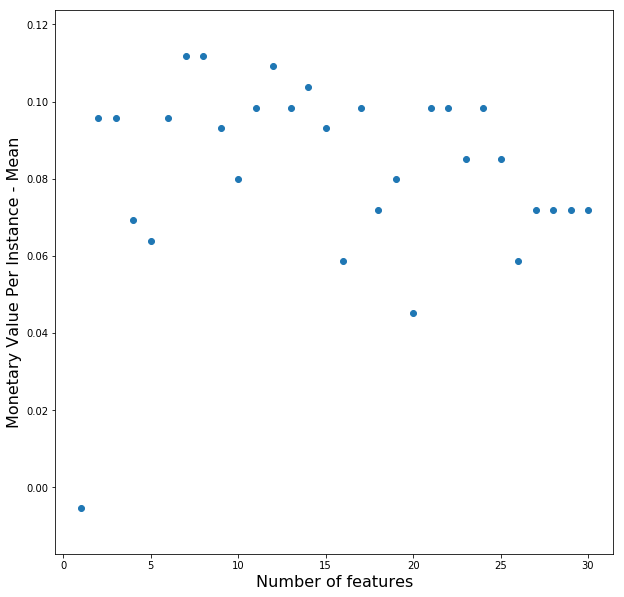

In [98]:
plt.rcParams['figure.figsize'] = (10,10)

plt.scatter(result_table["Feature Count"], result_table["Monetary Value Per Instance - Mean"])
plt.xlabel('Number of features', fontsize=16)
plt.ylabel('Monetary Value Per Instance - Mean', fontsize=16)

In [99]:
best_model = result_table.loc[result_table["Monetary Value Per Instance - Mean"].argmax()]["Raw Model"]
best_model_features = result_table.loc[result_table["Monetary Value Per Instance - Mean"].argmax()]["Features"]
best_parameters = result_table.loc[result_table["Monetary Value Per Instance - Mean"].argmax()]["Optimal Parameters"]

model_pos = result_table.iloc[17,8]
print(model_pos)

print(best_model)
print(best_model_features)
print(best_parameters)

VotingClassifier(estimators=[('ada', AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
          n_estimators=100, random_state=None)), ('xgb', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
 ...e=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.8))],
         flatten_transform=None, n_jobs=50, voting='soft', weights=[5, 3])
VotingClassifier(estimators=[('ada', AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
          n_estimators=100, random_state=None)), ('xgb', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
 ...e=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.8))],
         flatten_transform=None, n_jobs=50, voting='soft', weights=[5, 3])
['pca_

In [100]:
best_model = result_table.loc[result_table["Monetary Value Per Instance - Mean"].argmax()]["Raw Model"]

In [101]:
from sklearn.metrics import confusion_matrix

def get_monetary_value(cm):
        tn, fp, fn, tp = cm.ravel()
        print("True negative: ", tn)
        print("False positive: ", fp)
        print("False negative: ", fn)
        print("True positive: ", tp)
        score = (-25)*fp + (-5)*fn + 5*tp
        print(str(score) + " for " + str(sum(sum(cm))) + " instances in the test set")
        print(str(score/sum(sum(cm))) + " per instance in the test set")
        return score
    
cm = confusion_matrix(Y , best_model.predict(X[best_model_features]))

monetary_value = get_monetary_value(cm)

True negative:  1774
False positive:  1
False negative:  3
True positive:  101
465 for 1879 instances in the test set
0.2474720596061735 per instance in the test set
